In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.
cobalt_n_2_o2 = 118./16.

# Read in Data

In [42]:
ctrl={}
case={}

ctrl['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
ctrl['machine_target']='gfdl.ncrc4-intel19-prod'
ctrl['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'

case['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
case['machine_target']='gfdl.ncrc4-intel19-prod'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'

#case=ctrl

In [43]:
hp_det_is_fast=True

In [44]:
short_casename=case['name'].replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-060822":
    fig_casename='gzCOBALT-tun_cy1'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-hp_cy5 gzCOBALT-hp_cy5


In [45]:
tmpdir = '/work/Jessica.Luo/tmp/'+case['name']

# read in files
diagTypes = ['ocean_cobalt_btm'] 

pp_dates='1988-2007'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]
files=sorted([f for fi in files for f in fi]) # nested list comprehension


print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-hp_cy5/ocean_cobalt_btm.1988-2007.11.nc', '/work/Je

In [46]:
ds=xr.open_mfdataset(files, combine='by_coords')

grid_file=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
grid=xr.open_dataset(grid_file)

In [47]:
tmpdir = '/work/Jessica.Luo/tmp/'+ctrl['name']
    
# read in files
diagTypes = ['ocean_cobalt_btm'] 

c_pp_dates='1988-2007'

c_files=[glob(tmpdir + '/'+ d + '.' + c_pp_dates + '*.nc') for d in diagTypes]
c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

print(c_files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/

In [48]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

## Observations

In [49]:
obs_file = '/work/jyl/validation_data/Jorgensen_Data/Jorgensen_etal_2022_TOU_x0.1.nc'
obs = xr.open_dataset(obs_file)

# Plot

In [50]:
ds.fnoxic_sed

<xarray.DataArray 'fnoxic_sed' (time: 12, yh: 576, xh: 720)>
dask.array<concatenate, shape=(12, 576, 720), dtype=float32, chunksize=(1, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00
Attributes:
    long_name:      Sediment oxic Ndet remineralization flux
    units:          mol m-2 s-1
    cell_measures:  area: areacello
    cell_methods:   area:mean yh:mean xh:mean time: mean within months time: ...
    time_avg_info:  average_T1,average_T2,average_DT

In [51]:
ds.fnfeso4red_sed

<xarray.DataArray 'fnfeso4red_sed' (time: 12, yh: 576, xh: 720)>
dask.array<concatenate, shape=(12, 576, 720), dtype=float32, chunksize=(1, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 1999-07-18 00:00:00 ... 2000-06-17 00:00:00
Attributes:
    long_name:      Sediment Ndet Fe and SO4 reduction flux
    units:          mol m-2 s-1
    cell_measures:  area: areacello
    cell_methods:   area:mean yh:mean xh:mean time: mean within months time: ...
    time_avg_info:  average_T1,average_T2,average_DT

In [52]:
o2_consumption=ds.fnoxic_sed * cobalt_n_2_o2 * 1e3 * seconds_per_day # convert to mmol O2 m-2 d-1

In [53]:
vmin=-0.5
vmax=2
ticks=np.linspace(vmin,vmax,6)
ticks10=[np.round(10**x,2) for x in ticks]
ticks10

[0.32, 1.0, 3.16, 10.0, 31.62, 100.0]

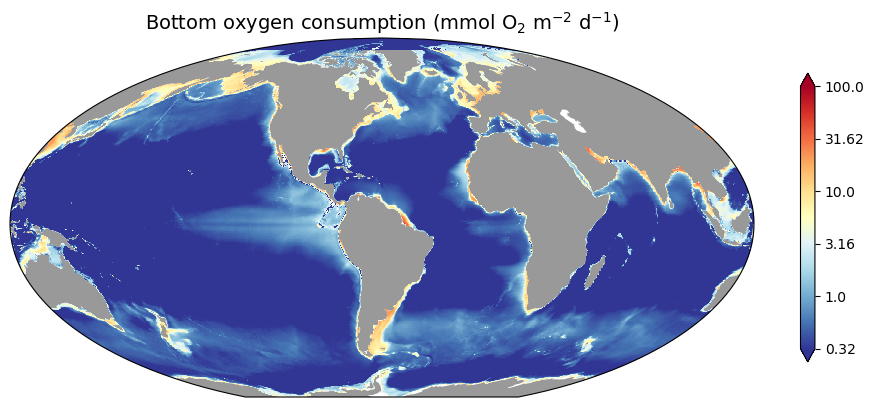

In [54]:
plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.Mollweide(central_longitude=300.0))

field=np.log10(o2_consumption.mean(dim='time'))

ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs=ax.pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='RdYlBu_r')

cbar=plt.colorbar(cs, extend='both', ticks=ticks, shrink=0.75)
cbar.ax.set_yticklabels(ticks10)

plt.title('Bottom oxygen consumption (mmol O$_2$ m$^{-2}$ d$^{-1}$)', fontsize=14)
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_Bottom_Oxygen_Consumption.png', dpi=300, bbox_inches='tight')

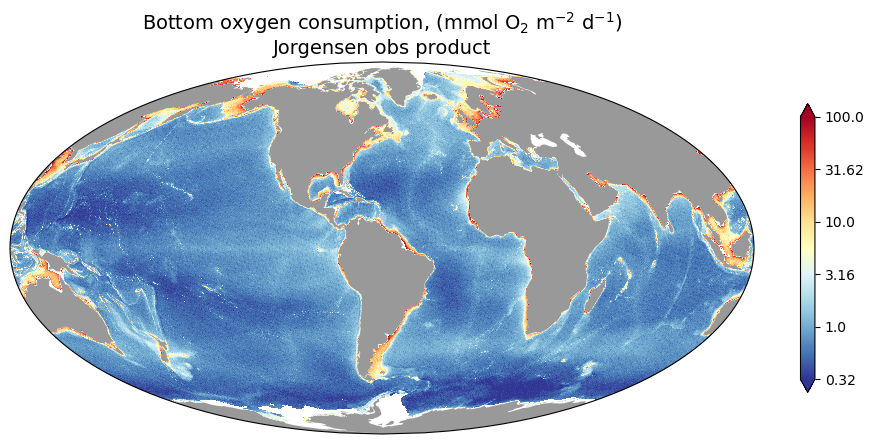

In [15]:
plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.Mollweide(central_longitude=300.0))

field=np.log10(obs.TOU.values)

ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs=ax.pcolormesh(obs.x.values, obs.y.values, field, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='RdYlBu_r')

cbar=plt.colorbar(cs, extend='both', ticks=ticks, shrink=0.75)
cbar.ax.set_yticklabels(ticks10)

plt.title('Bottom oxygen consumption, (mmol O$_2$ m$^{-2}$ d$^{-1}$)\nJorgensen obs product', fontsize=14)
plt.savefig('plots/Obs_Bottom_Oxygen_Consumption.png', dpi=300, bbox_inches='tight')

# Read in Obs Points

In [329]:
import pandas as pd
jo2=pd.read_csv('/work/jyl/validation_data/Jorgensen_Data/Jorgensen_datatable.csv')
#jo2=pd.read_csv('/work/jyl/validation_data/Jorgensen_Data/Jorgensen_datatable_excl_exsitufluxes.csv')
jo2=jo2[['Selection-ID', 'TOU_mmol.m2.d', 'Lat', 'Long', 'Depth']]
jo2=jo2.rename(columns={'Long':'lon', 'Lat':'lat'})
jo2=jo2.dropna()
jo2

,Selection-ID,TOU_mmol.m2.d,lat,lon,Depth
0,0,0.37,42.4333,3.70,785.0
1,0,0.37,42.4333,3.70,785.0
2,0,1.98,42.4333,3.70,785.0
3,0,2.22,42.4333,3.70,785.0
4,2,1.24,42.4333,3.70,785.0
...,...,...,...,...,...
4333,"0, 3",9.12,55.6200,21.15,1.0
4334,"0, 3",31.20,55.6200,21.15,1.0
4335,"0, 3",50.64,55.6200,21.15,1.0
4336,"0, 3",51.36,55.6200,21.15,1.0


In [330]:
jo2['Selection-ID'].unique()

array(['0', '2', '1', '0, 3', '2, 3', '1, 3', '0, 3, 4', '2, 3, 4',
       '0, 3,, 4', '0, 5', '2, 5', '1, 5', '1, 4, 5', '0, 4', '2, 4',
       '1, 4', '1, 3, 4'], dtype=object)

In [331]:
# from the excel spreadsheet:
# The selection-ID indicates data treatment and the selction for our model analysis ("0" multiple data from one site (regular font), 
# "1" single data from one site (bold font), "2" averaged multiple data points (bold font), "3" in situ <10m water depth, 
# "4" methodical exclusion, "5" bottom water <25 µM O2). 

# we exclude all the 4's and 0's
jo2=jo2.loc[jo2['Selection-ID'].isin(['1', '2', '2, 3', '1, 3', '2, 5', '1, 5'])]
jo2=jo2.loc[jo2['Depth'] >= 15.0]

jo2

,Selection-ID,TOU_mmol.m2.d,lat,lon,Depth
4,2,1.24,42.4333,3.7000,785.0
9,2,3.40,42.4667,3.5000,912.0
14,2,36.76,42.4833,3.1500,35.0
17,2,1.30,42.4833,3.5000,330.0
20,2,11.05,42.5000,3.2167,87.0
...,...,...,...,...,...
4272,1,51.59,45.1669,31.0500,53.0
4273,1,40.13,45.2039,29.8472,26.0
4274,1,26.80,45.5383,29.7761,16.0
4276,1,35.53,46.4244,31.1875,23.0


Text(0.5, 1.0, 'Jorgensen et al. 2022 data points')

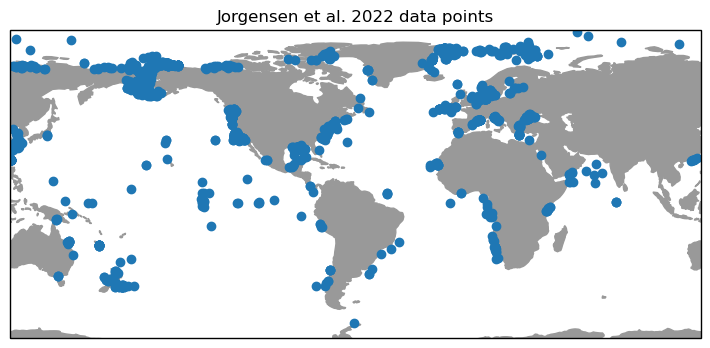

In [332]:
plt.figure(figsize=(10,4))
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=300.))

ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs=ax.scatter(jo2.lon, jo2.lat, transform=ccrs.PlateCarree())
plt.title('Jorgensen et al. 2022 data points')

## Regrid model to observational points

In [333]:
var_keep = ['fnoxic_sed', 'time', 'xh', 'yh']
do = ds.drop([v for v in ds.variables if v not in var_keep])
do = do.squeeze(drop=True)
do = do.rename({'xh': 'lon', 'yh': 'lat'})
do = do.mean(dim='time')
do

<xarray.Dataset>
Dimensions:     (lat: 576, lon: 720)
Coordinates:
  * lon         (lon) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * lat         (lat) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables:
    fnoxic_sed  (lat, lon) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>

In [334]:
jo2_locs=xr.Dataset()
jo2_locs['lon']=xr.DataArray(data=jo2.lon.values, dims=('location'))
jo2_locs['lat']=xr.DataArray(data=jo2.lat.values, dims=('location'))

In [335]:
import xesmf as xe

regridder_jo2 = xe.Regridder(do, jo2_locs, 'bilinear', locstream_out=True, reuse_weights=True)

Reuse existing file: bilinear_576x720_1x1775.nc


In [336]:
ds_jo2_rg = regridder_jo2(do)

using dimensions ('lat', 'lon') from data variable fnoxic_sed as the horizontal dimensions for this dataset.


In [337]:
ds_jo2_rg['o2_consumption']=ds_jo2_rg.fnoxic_sed * cobalt_n_2_o2 * 1e3 * seconds_per_day # convert to mmol O2 m-2 d-1

## Calculate r and RMSE

In [338]:
from scipy.stats import pearsonr

In [339]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [340]:
model_jo2 = ds_jo2_rg.to_dataframe()
model_jo2 = model_jo2[['lat', 'lon','o2_consumption']]
model_jo2.reset_index(drop=True)

merged_jo2 = pd.merge(jo2,model_jo2, on=['lat','lon'])
merged_jo2 = merged_jo2.dropna()
merged_jo2

,Selection-ID,TOU_mmol.m2.d,lat,lon,Depth,o2_consumption
0,2,1.24,42.4333,3.7000,785.0,2.686893
1,2,3.40,42.4667,3.5000,912.0,5.241649
3,2,1.30,42.4833,3.5000,330.0,5.367752
5,1,2.90,5.3442,-81.9365,3870.0,1.119954
6,2,15.35,59.5833,22.4667,73.0,7.419380
...,...,...,...,...,...,...
2951,1,16.27,44.8828,31.8764,63.0,6.086154
2952,1,18.46,45.0064,30.8319,57.0,11.790198
2953,1,25.22,45.0814,29.7814,21.0,17.076821
2954,1,51.59,45.1669,31.0500,53.0,12.052138


In [341]:
model=merged_jo2['o2_consumption']
obs=merged_jo2['TOU_mmol.m2.d']
jo2_corr = pearsonr(model, obs)[0]
jo2_rmse = rmse(model, obs)

print(jo2_corr, jo2_rmse)

0.3535525345528516 10.932548722314785


# Plot Comparison

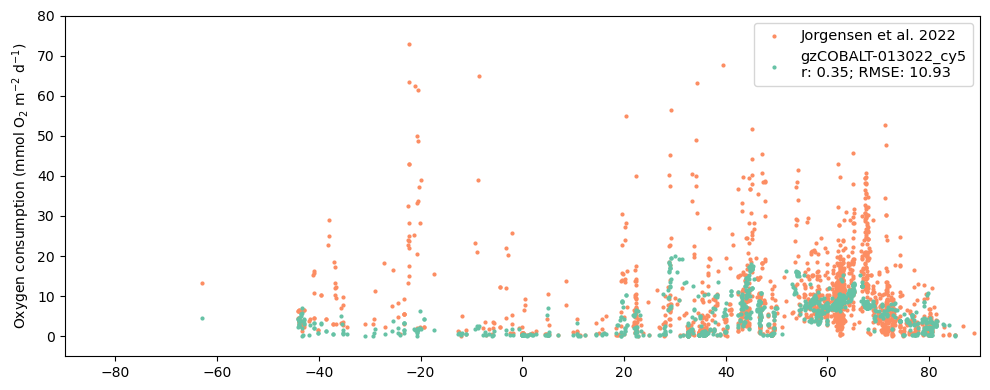

In [342]:
fig=plt.figure(figsize=(10,4))
gs=gridspec.GridSpec(1,1)

alpha=1
size=4
legend_text_size=10.5
color2='#66c2a5'
color1='#fc8d62'

fig.add_subplot(gs[0,0])
plt.ylim([-5,80])
plt.xlim([-90,90])
plt.ylabel('Oxygen consumption (mmol O$_2$ m$^{-2}$ d$^{-1}$)')
plt.scatter(x=jo2.lat, y=jo2['TOU_mmol.m2.d'], alpha=alpha, s=size, c=color1)
plt.scatter(x=ds_jo2_rg.lat.values, y=ds_jo2_rg['o2_consumption'].values, alpha=alpha, s=size, c=color2)
plt.legend(['Jorgensen et al. 2022', 
            fig_casename + '\nr: ' + str(np.round(jo2_corr,2)) + '; RMSE: '+str(np.round(jo2_rmse,2))],
          prop={'size': legend_text_size})


plt.tight_layout()
#plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_BottomO2ConsumptionvsObs.png', dpi=300, bbox_inches='tight')

In [ ]:
fig=plt.figure(figsize=(10,4))
gs=gridspec.GridSpec(1,1)

alpha=1
size=4
legend_text_size=10.5
color2='#66c2a5'
color1='#fc8d62'

fig.add_subplot(gs[0,0])
plt.ylim([-1.5,2])
plt.xlim([-90,90])
plt.ylabel('Log10 Oxygen consumption (mmol O$_2$ m$^{-2}$ d$^{-1}$)')
plt.scatter(x=jo2.lat, y=np.log10(jo2['TOU_mmol.m2.d']), alpha=alpha, s=size, c=color1)
plt.scatter(x=ds_jo2_rg.lat.values, y=np.log10(ds_jo2_rg['o2_consumption'].values), alpha=alpha, s=size, c=color2)
plt.legend(['Jorgensen et al. 2022', 
            fig_casename + '\nr: ' + str(np.round(jo2_corr,2)) + '; RMSE: '+str(np.round(jo2_rmse,2))],
          prop={'size': legend_text_size})


plt.tight_layout()
#plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_Export_ModelvsObs.png', dpi=300, bbox_inches='tight')